In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
attack = 'D1D2vsD3'

# in_model = load_model(f'/prj/side_channel/Pinata/results/DKTA/k0 sIN/1d/10k/best_model_{attack}__ga.h5')
out_model = load_model(f'/prj/side_channel/Pinata/results/DKTA/k0 sOUT/2d/10k/best_model_{attack}__ga.h5')

2022-09-06 11:42:49.828330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 11:42:49.833932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 11:42:49.834095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 11:42:49.834703: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
# in_layers_rev = list(reversed(in_model.layers))
out_layers_rev = list(reversed(out_model.layers))

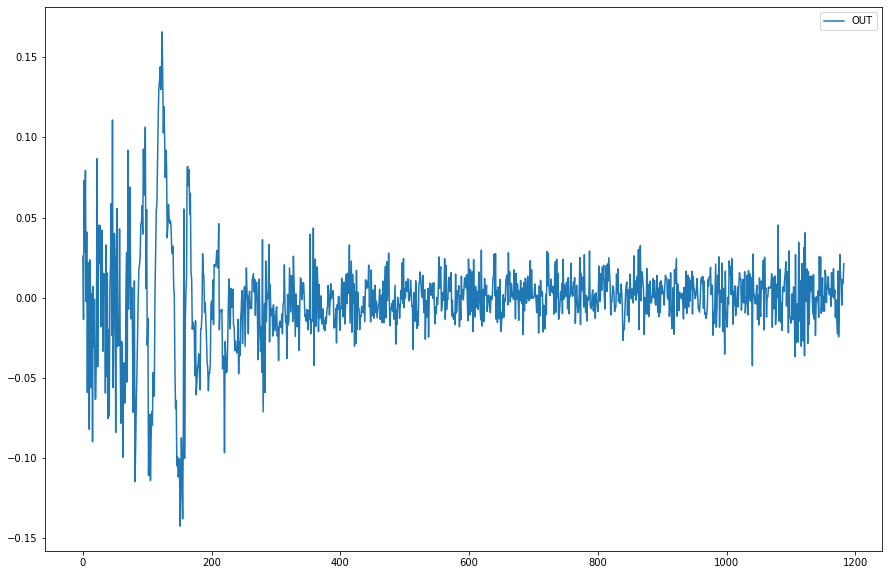

In [42]:
# in_scores = np.ones(256)
# for layer in in_layers_rev:
#     if isinstance(layer, tf.keras.layers.Dense):
#         weights = layer.get_weights()[0]
#         # weights_norm = weights / np.linalg.norm(weights)
#         in_scores = np.dot(weights, in_scores)
# in_scores = in_scores / np.linalg.norm(in_scores) 
        
out_scores = np.ones(256)
for layer in out_layers_rev:
    if isinstance(layer, tf.keras.layers.Dense):
        weights = layer.get_weights()[0]
        # weights_norm = weights / np.linalg.norm(weights)
        out_scores = np.dot(weights, out_scores)
out_scores = out_scores / np.linalg.norm(out_scores) 

f, ax = plt.subplots(figsize=(15,10))
# ax.plot(in_scores, label='IN')
ax.plot(out_scores, label='OUT')
# ax.set_ylim([-0.5, 0.5])
plt.legend()
plt.show()

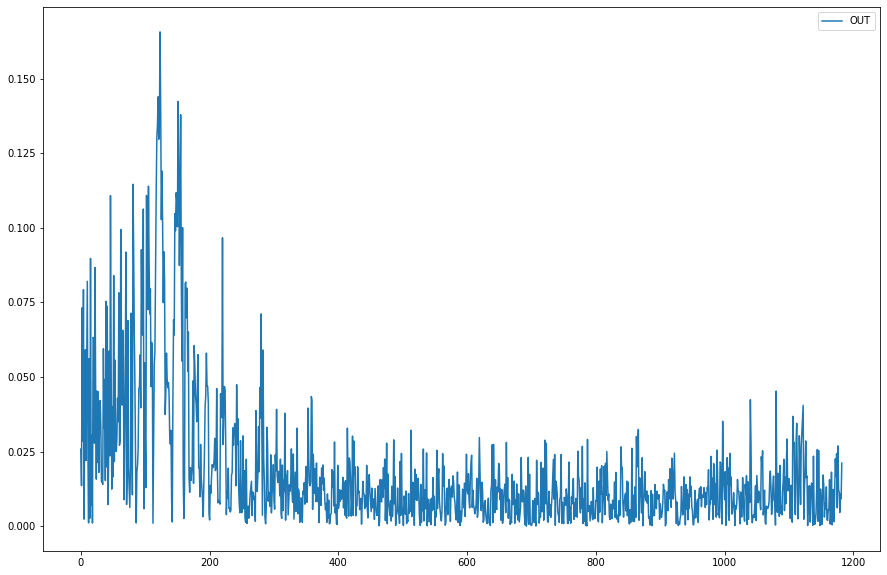

In [43]:
f, ax = plt.subplots(figsize=(15,10))
# ax.plot(abs(in_scores), label='IN')
ax.plot(abs(out_scores), label='OUT')
# ax.set_ylim([0, 0.5])
plt.legend()
plt.show()

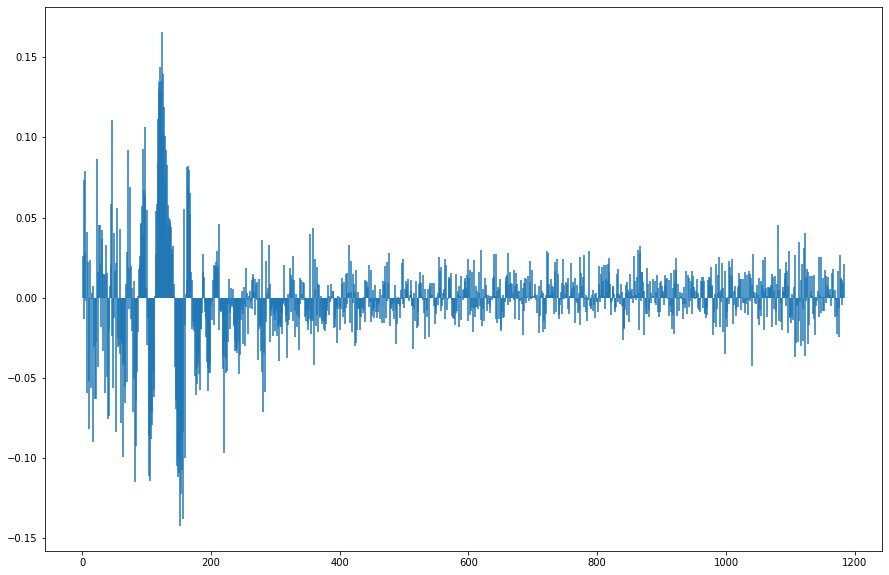

In [44]:
f, ax = plt.subplots(figsize=(15,10))

for i in range(len(out_scores)):
    # ax.vlines(x=i+1, ymin=0, ymax=in_scores[i], color='b')
    ax.vlines(x=i+1, ymin=0, ymax=out_scores[i])
    # ax.set_ylim([-0.3, 0.3])

plt.show()

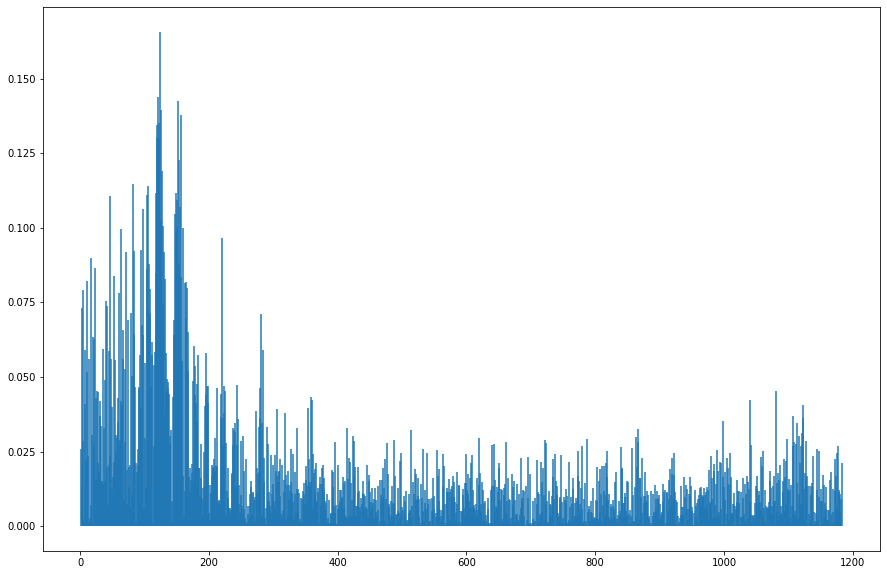

In [45]:
f, ax = plt.subplots(figsize=(15,10))

for i in range(len(out_scores)):
    # ax.vlines(x=i+1, ymin=0, ymax=abs(in_scores[i]), color='b')
    ax.vlines(x=i+1, ymin=0, ymax=abs(out_scores[i]))
    # ax.set_ylim([0, 0.3])

plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
attack = 'D1D2vsD3'

# in_model = load_model(f'/prj/side_channel/Pinata/results/DKTA/k0 sIN/1d/10k/best_model_{attack}__ga.h5')
model = load_model(f'/prj/side_channel/Pinata/results/DKTA/SBOX_OUT/2d/10k/best_model_{attack}__ga.h5')

In [8]:
import pandas as pd
import sys
sys.path.insert(0, '../../src/utils')
import constants
from data_loader import DataLoader, SplitDataLoader

train_dl = SplitDataLoader(
    [f'{dev}-{k}' for k in list(constants.KEYS)[1:] for dev in ['D1', 'D2']], 
    n_tot_traces=100000,
    train_size=0.9,
    target='SBOX_OUT',
    byte_idx=0
)
train_data, val_data = train_dl.load()
x_train, y_train, _, _ = train_data
x_val, y_val, _, _ = val_data

train_df = pd.DataFrame(x_train, columns=[f'sample{i}' for i in range(len(x_train[0]))])
train_labels = [el.tolist().index(1) for el in y_train]

val_df = pd.DataFrame(x_val, columns=[f'sample{i}' for i in range(len(x_val[0]))])
val_labels = [el.tolist().index(1) for el in y_val]

In [9]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(val_df, val_labels)
print(perm.feature_importances_)
print(val_df.columns)
eli5.show_weights(perm, feature_names=val_df.columns.tolist())

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x7f7144a6f8b0> does not.